## Aliasing Test

The spectrum of the signal 

$$a(t)=\lvert s(t)\rvert^2=\lvert\mathcal{F}^{-1}\left\{S(\omega)\right\}\rvert^2,$$ 

where $\mathcal{F}$ denotes the Fourier transform operation, is given by

$$A(\omega) = \mathcal{F}\left\{a(t)\right\} = \int S(\omega')S^*(\omega + \omega')\text{d}\omega'.$$

By direct substitution, it can be shown that $A(\omega)=A^*(-\omega)$.

In any case, the expression for the spectrum suggests that the square magnitude of a Nyquist-sampled signal is undersampled since the correlation operation creates a bandwidth response that spans twice the range of the original signal $S(\omega)$.

In [1]:
import sys
sys.path.append(r"C:\Users\Ishuwa.Sikaneta\local\sarsim")

In [2]:
from radar.common.utils import FFT_freq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define the Bandwdith, chirp rate, chirp length and required number of samples of the baseband signal.

In [3]:
B = 100e6
tau = 20e-6
rate = B/tau
fs = 100e6
fc = 0
Ns = int(np.ceil(fs*tau))

In [4]:
# Define the baseband signal in frequency space. Use the FFT_freq function to compute and 
# pulate appropriate indices of the zero-padded signal.
fdata = np.ones(Ns)
padded_fdata = np.zeros(2*Ns)
idx = FFT_freq(Ns, Ns, 0).astype(int)
padded_fdata[idx] = fdata

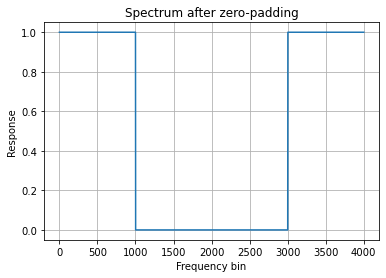

In [5]:
plt.figure()
plt.plot(padded_fdata)
plt.grid()
plt.title('Spectrum after zero-padding')
plt.xlabel('Frequency bin')
plt.ylabel('Response')
plt.show()

In [6]:
# Compute the square magnitude signals (apply the fftshift for display)
data = np.fft.fftshift(np.abs(np.fft.ifft(fdata))**2)
padded_data = 4*np.fft.fftshift(np.abs(np.fft.ifft(padded_fdata))**2)
ax1 = np.arange(Ns)
ax2 = np.arange(2*Ns)/2

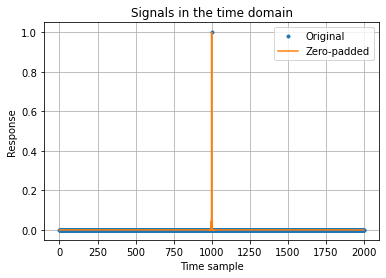

In [7]:
plt.figure()
plt.plot(ax1,data,'.',ax2-0.5,padded_data)
plt.grid()
plt.title('Signals in the time domain')
plt.xlabel('Time sample')
plt.ylabel('Response')
plt.legend(['Original','Zero-padded'])
plt.show()

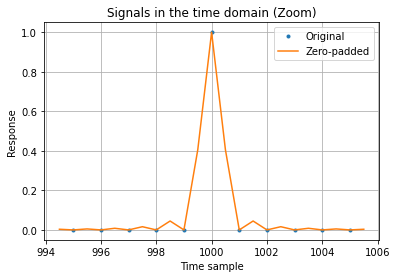

In [8]:
plt.figure()
plt.plot(ax1[995:1006],data[995:1006],'.',ax2[1990:2013]-0.5,padded_data[1990:2013])
plt.grid()
plt.title('Signals in the time domain (Zoom)')
plt.xlabel('Time sample')
plt.ylabel('Response')
plt.legend(['Original','Zero-padded'])
plt.show()

### Compute and plot the spectrum of the square-magnitude signals

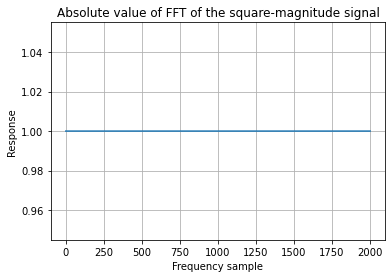

In [9]:
fdata_power = np.abs(np.fft.fft(data))
plt.figure()
plt.plot(fdata_power)
plt.grid()
plt.title(r'Absolute value of FFT of the square-magnitude signal')
plt.xlabel('Frequency sample')
plt.ylabel('Response')
plt.show()

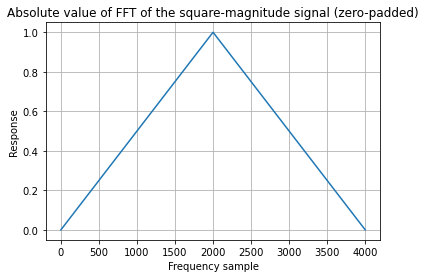

In [10]:
fdata_padded_power = np.fft.fftshift(np.abs(np.fft.fft(padded_data)))/2
plt.figure()
plt.plot(fdata_padded_power)
plt.grid()
plt.title(r'Absolute value of FFT of the square-magnitude signal (zero-padded)')
plt.xlabel('Frequency sample')
plt.ylabel('Response')
plt.show()

## Comments

These results are as expected.

In the case of a sampled signal, the correlation may be written as

$$A(k) = \frac{1}{N}\sum_{k'=0}^{N-1}S(k+k')S^*(k')$$

This correlation is circular.

